In [70]:
from importlib import reload
import os
from EnHiC import fit
import numpy as np 
import tensorflow as tf
from utils import operations
import matplotlib.pyplot as plt

In [15]:
os.chdir("/Users/amulyagarimella/Documents/2241finalproject/EnHiC/")

In [16]:
hic_lr = np.load("/Users/amulyagarimella/Documents/2241finalproject/data/input_EnHiC_8000000_400/GM12878/LR/chr21/GM12878_LR_chr21_0-2.npz", allow_pickle=True)


(3, 400, 400)

In [38]:
index_1d_2d = hic_lr["index_1D_2D"]

In [39]:
input_dataset = tf.data.Dataset.from_tensor_slices(hic_lr["hic"][..., np.newaxis]).batch(1)

In [40]:
reload(fit)

<module 'EnHiC.fit' from '/Users/amulyagarimella/Documents/2241finalproject/EnHiC/EnHiC/fit.py'>

In [41]:
len_size = 400
mpath = os.path.join("./",'pretrained_model', 'gen_model_{}'.format(len_size), 'gen_weights')

enhic_pred = fit.predict(model_path = mpath, len_size=400, scale=4, ds=input_dataset)

Generator: 
input_data shape: (1, 400, 400, 1)
input_data shape: (1, 400, 400, 1)
input_data shape: (1, 400, 400, 1)
prediction shape: (3, 400, 400, 1)


In [42]:
enhic_pred = np.squeeze(enhic_pred, axis=3)

In [43]:
enhic_pred.shape

(3, 400, 400)

In [62]:
reload(operations)

<module 'utils.operations' from '/Users/amulyagarimella/Documents/2241finalproject/EnHiC/EnHiC/utils/operations.py'>

In [101]:
genomic_distance = 8000000
resol = 40000//4 
merged =operations.merge_hic(enhic_pred, index_1D_2D=hic_lr["index_1D_2D"].item(), max_distance=genomic_distance//40000)

lenindex:  3
n:  4
matrix shape:  (800, 800)
h:  0 w:  1
x:  0 y:  200
x + half height:  200
y + half width:  400
(200, 200)
(200, 200)
h:  1 w:  2
x:  200 y:  400
x + half height:  400
y + half width:  600
(200, 200)
(200, 200)
h:  2 w:  3
x:  400 y:  600
x + half height:  600
y + half width:  800
(200, 200)
(200, 200)


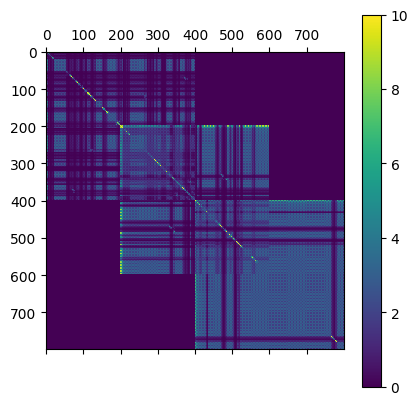

In [102]:
plt.matshow(merged, vmax=10)
plt.colorbar()  

In [103]:
orig_merged =operations.merge_hic(hic_lr["hic"], index_1D_2D=hic_lr["index_1D_2D"].item(), max_distance=genomic_distance//40000)

lenindex:  3
n:  4
matrix shape:  (800, 800)
h:  0 w:  1
x:  0 y:  200
x + half height:  200
y + half width:  400
(200, 200)
(200, 200)
h:  1 w:  2
x:  200 y:  400
x + half height:  400
y + half width:  600
(200, 200)
(200, 200)
h:  2 w:  3
x:  400 y:  600
x + half height:  600
y + half width:  800
(200, 200)
(200, 200)


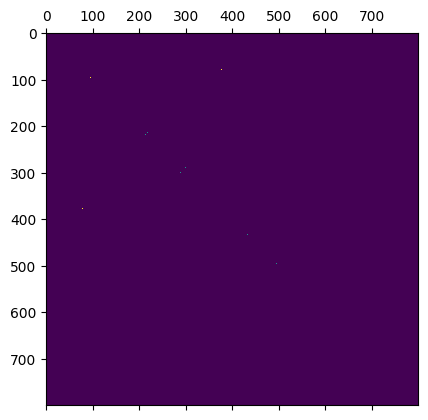

In [104]:
plt.matshow(orig_merged)